The goal of this lab session is to show the use of decision trees for classification and regression problems in Python (sklearn). This document freely includes some examples shown in the excellent Scikit-Learn documentation.

# Decision trees

Decision trees are non-parametric learning methods used for classification and regression problems. The goal is to create a model that predicts the values of the target variable, based on a set of decision rule sequences derived from the training data. The tree, therefore, approximates the target by a succession of if-then-else rules. This paradigm works well for categorical data but also for numerical data. The more complex the generated tree, the more the model "explains" the learning data but also the more chances of over-fitting.

Decision trees have a number of advantages that make them preferred in situations where it is useful to understand decision sequences:

    1)They are simple to understand and visualize.
    2)They require little data preparation.
    3)The cost of using trees is logarithmic.
    4)They are able to use categorical and numerical data.
    5)They are able to handle multi-class problems.
    6)White box model: the result is easy to conceptualize and visualize.

Disadvantages:

    1)Over-fitting: sometimes the generated trees are too complex and generalize badly. Choosing the correct values for the maximum depth (max_depth) and the minimum number of examples per sheet (min_samples_leaf) settings helps to avoid this problem.

    2)Sometimes the trees generated are not balanced (which implies that the travel time is no longer logarithmic). It is therefore recommended to adjust the database before construction so that one class largely dominates the others (in terms of the number of learning examples).

## Trees for classification
In Scikit-learn it is the class $sklearn.tree.DecisionTreeClassifier$ that allows making a multi-class classification on a database. This class needs as input an $X$ matrix of size $[n\_samples, n\_features]$ containing the data and a $Y$ vector of size $[n\_samples]$ with the values of the target class.

We start by importing the right modules and building the tree object:

In [1]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

The data:

In [2]:
X = [[0, 0], [1, 1]]
Y = [0, 1]

Model construction:

In [3]:
clf = clf.fit(X, Y)

Prediction on new samples:

In [4]:
clf.predict([[2., 2.]])

array([1])

One can also predict the probability of each class for a given sample (which is calculated as the fraction of training data in each sheet):

In [76]:
clf.predict_proba([[2., 2.]])

array([[ 0.,  1.]])

## Iris data classification

$DecisionTreeClassifier$ is able to handle multi-class classification problems (for example, with labels 0, 1, ... K-1). In this example, we will work with the <a href="https://archive.ics.uci.edu/ml/datasets/Iris">Iris</a> database, easily accessible in sklearn.
This database contains 3 classes of 50 instances, each class referring to a variety of iris (plant). One class is linearly separable from the other two, but the other two are not separable from each other. The variable to predict is the variety of iris.

Attributes :

    1)sepal length,
    2)sepal width,
    3)petal length,
    4)petal width,
    5)class: Iris Setosa, Iris Versicolor or Iris Virginica.
    
One sample: (4.9,3.6,1,4,0.1, "Iris-setosa")

In [5]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

Once the training is finished we can visualize the created tree by using the $graphviz$ tool


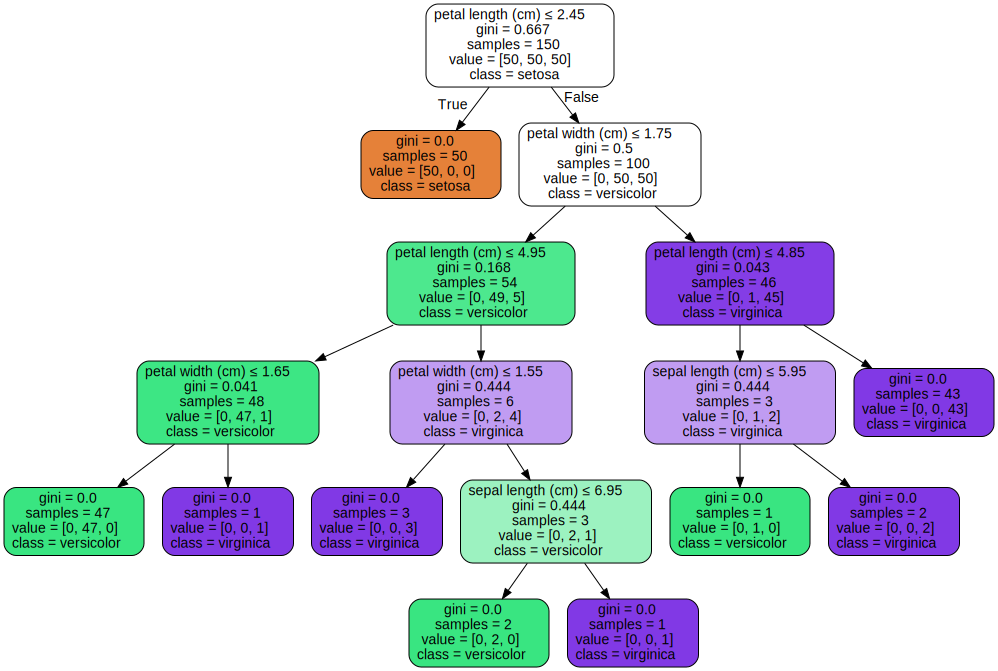

In [6]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,
                                class_names=iris.target_names, 
                                filled=True, rounded=True, 
                                special_characters=True) 

import graphviz 
graph = graphviz.Source(dot_data)
graph

After its construction, the model can be used for prediction:

In [12]:
clf.predict(iris.data[:1, :])

array([0])

In [13]:
clf.predict_proba(iris.data[:1, :])

array([[1., 0., 0.]])

### Question:
Change the values of the parameter $max\_depth$ and $min\_samples\_leaf$. What do you notice?

## Answer
The $max\_depth$ parameter is a threshold on the maximum depth of the tree. The $min\_samples\_leaf$ parameter gives the minimum number of samples in a leaf node. They make it possible to put constraints on the construction of the tree and thus to control indirectly the phenomenon of over-fitting.

Example of use :

In [9]:
clf = tree.DecisionTreeClassifier(max_depth = 3)


or 

In [10]:
clf = tree.DecisionTreeClassifier(min_samples_leaf = 20)

Here is the tree obtained with $min\_samples\_leaf = 20$. It has more elements in the leaves, so fewer nodes and the tree is less deep.

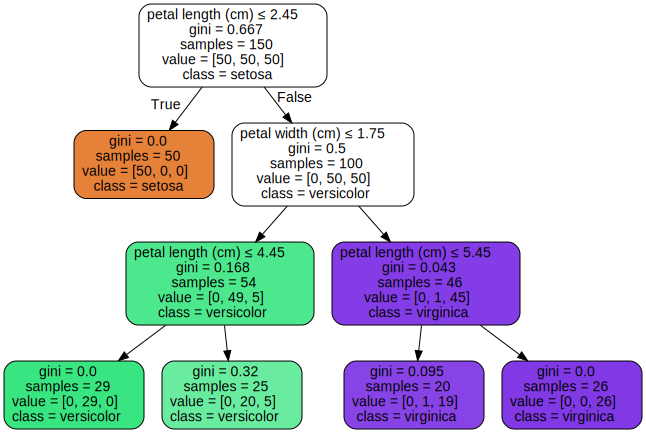

In [11]:
clf = clf.fit(iris.data, iris.target)
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,
                                class_names=iris.target_names, 
                                filled=True, rounded=True, 
                                special_characters=True) 

import graphviz 
graph = graphviz.Source(dot_data)
graph

### Question:

Make a random database partition in training / test ($70\%$ training, $30\%$ test) and calculate the rate of misclassified items on the test set. Vary the values of the $max\_depth$ and $min\_samples\_leaf$ parameters to see how they affect that score.

### Answer :

In general, we use a training/test division of $80/20$ or $70/30$ type but here the training problem is particularly simple we take only $5\%$  for training sample (otherwise, we will risk not seeing any  changing in the tree when we modify $max\_depth$ and $min\_samples\_leaf$).

In [84]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target,
            test_size=0.95, random_state=0)

for mdepth in [1, 2, 3, 4, 5, 6, 7]:
    clf = tree.DecisionTreeClassifier(max_depth=mdepth)
    clf = clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))

0.657342657343
0.664335664336
0.797202797203
0.755244755245
0.811188811189
0.797202797203
0.601398601399


In [85]:
for msplit in [2, 3, 5, 10, 15, 20]:
    clf = tree.DecisionTreeClassifier(min_samples_split=msplit)
    clf = clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))


0.706293706294
0.797202797203
0.622377622378
0.321678321678
0.321678321678
0.321678321678


To find good values for the parameters we can use cross-validation with $GridSearchCV$:

In [86]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target,
    test_size=0.30, random_state=0)

from sklearn.model_selection import GridSearchCV

pgrid = {"max_depth": [1, 2, 3, 4, 5, 6, 7],
      "min_samples_split": [2, 3, 5, 10, 15, 20]}

grid_search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=pgrid, cv=10)

grid_search.fit(X_train, y_train)

grid_search.best_estimator_.score(X_test, y_test)


/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.97777777777777775

## Display of the decision area

For a pair of attributes we can visualize the decision surface in 2 dimensions. First we discretize the two-dimensional domain with a constant step and then we evaluate the model on each point of the grid.

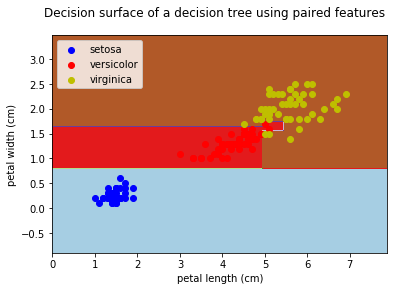

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# parameters
n_classes = 3
plot_colors = "bry" # blue-red-yellow
plot_step = 0.02

# load data
iris = load_iris()

# choose  petal attributes length and width
pair = [2, 3]

# keep only these two attributes
X = iris.data[:, pair]
y = iris.target

# training
clf = DecisionTreeClassifier().fit(X, y)

# display the decision surface in two dimension
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")

# display training discrete points

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)
plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.savefig('fig.png')
plt.show()

### Question:

Redo the display for the other pairs of attributes. On which pair is the separation between classes is must visible?

## Decision trees for regression

For regression with decision trees, Scikit-learn offers the $DecisionTreeRegressor$ class. As for the classification, the method $fit (...)$ takes as input the parameter $X$ (attributes of the observations). Warning: $y$ are not class labels but real values.

In [88]:
from sklearn import tree
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])

array([ 0.5])

In the following example we will construct a sinusoidal signal affected by white noise and we will train a regression tree on this training data.

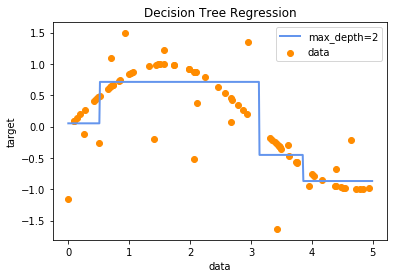

In [89]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# simulation of the training data
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()


y[::5] += 3 * (0.5 - rng.rand(16))

# train the model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_1.fit(X, y)

# Prediction
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)

# display the results
plt.figure()
plt.scatter(X, y, c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## Question
Change the value of the $max\_depth$ parameter. What happens if you use a very large value? Too small value? Change the rate of elements affected by noise (the $y [:: 5]$). When all elements are affected by noise, should a high or low value be preferred for $max\_depth$?

### Question:

Load the database Diabetes module sklearn.datasets and make a random partition for training and test ($70\%$ training, $30\%$ test). Construct a regression tree model. Calculate the mean squared error on the test set. Make a grid search to find the value of the $max\_depth$ parameter that minimizes this error.

### Answer

In [90]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X_train, X_test, y_train, y_test = model_selection.train_test_split(diabetes.data, diabetes.target, test_size=0.30, random_state=0)

clf = DecisionTreeRegressor(max_depth=4)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
print(mean_squared_error(y_test, y_predicted))


pgrid = {"max_depth": [2, 3, 4, 5, 6, 7]}
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid=pgrid, scoring='neg_mean_squared_error', cv=10)
grid_search.fit(X_train, y_train)
y_predicted = grid_search.best_estimator_.predict(X_test)

print(mean_squared_error(y_test, y_predicted))

print(grid_search.best_params_)


4477.74974589
4029.07293226
{'max_depth': 2}


/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
